# De relatie tussen zeespiegelstijging en tsunami’s
introductie. 

## Gemiddelde impact score
Om te onderzoeken of de stijgende zeespiegel invloed heeft op de impact van plaatsgevonden tsunami’s is per jaar de gemiddelde impactscore berekend. Deze wordt vervolgens vergeleken met de zeespiegelstijging, met als nulpunt het jaar 1900. De gemiddelde impactscore per jaar wordt weergeven op een logaritmische schaal. 

In [1]:

import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sea_level_df = pd.read_csv("Global_sea_level_rise.csv")

sea_df = pd.read_csv('Global_sea_level_rise.csv')
dist_df = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')

tsunami_df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'tsunami'].copy()
flood_df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'flood'].copy()

tsunami_df.columns = tsunami_df.columns.str.strip()
flood_df.columns = flood_df.columns.str.strip()
sea_df.rename(columns={'year': 'Year'}, inplace=True)

#subsets om samen te voegen
tsunami_subset = tsunami_df[['Year', 'Disaster Subtype', 'Country', 'Region', 'Continent', 'Origin', 'River Basin',
                             'Total Deaths', 'Total Affected', "Total Damages ('000 US$)", 'Latitude', 'Longitude', 'Location']]

flood_subset = flood_df[['Year', 'Disaster Subtype', 'Country', 'Region', 'Continent', 'Origin', 'River Basin',
                         'Total Deaths', 'Total Affected', "Total Damages ('000 US$)", 'Latitude', 'Longitude', 'Location']]

#eerste twee samen voegen
disaster_df = pd.concat([tsunami_subset, flood_subset], ignore_index=True)

#laatste samenvoegen
merged_df = disaster_df.merge(sea_df[['Year', 'mmfrom1993-2008average']], on='Year', how='left')

#missende waardes invullen met 0
merged_df = merged_df.fillna(0)

import numpy as np 
merged_df['Total Deaths'] = pd.to_numeric(merged_df['Total Deaths'], errors='coerce').fillna(0)
merged_df['Total Affected'] = pd.to_numeric(merged_df['Total Affected'], errors='coerce').fillna(0)
merged_df["Total Damages ('000 US$)"] = pd.to_numeric(merged_df["Total Damages ('000 US$)"], errors='coerce').fillna(0)

merged_df['Impact_Score'] = merged_df[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].max(axis=1)

merged_df = merged_df[(merged_df['Latitude'] != 0) & (merged_df['Longitude'] != 0)]

filtered_df = merged_df[merged_df['Impact_Score'] > 0].copy()

filtered_df['Impact_Score_Log'] = filtered_df['Impact_Score'].apply(lambda x: np.log10(x + 1))

filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['Year'])
filtered_df = filtered_df.sort_values('Year')
filtered_df['Year'] = filtered_df['Year'].astype(int)


avg_impact_per_year = filtered_df.groupby('Year')['Impact_Score'].mean().reset_index()

fig = go.Figure()


fig.add_trace(go.Bar(
    x=avg_impact_per_year['Year'],
    y=avg_impact_per_year['Impact_Score'],
    name='Gem. Impact Score',
    marker_color='steelblue',
    yaxis='y1',
    hovertemplate='Jaar: %{x}<br>Gem. Impact Score: %{y}<extra></extra>'
))
# Maak zeespiegelwaarden relatief t.o.v. het eerste jaar
first_year = filtered_df['Year'].min()
baseline = filtered_df.loc[filtered_df['Year'] == first_year, 'mmfrom1993-2008average'].values[0]
filtered_df['mmfrom1993-2008average'] = filtered_df['mmfrom1993-2008average'] - baseline

sea_level_data = filtered_df[['Year', 'mmfrom1993-2008average']].drop_duplicates()

fig.add_trace(go.Scatter(
    x=sea_level_data['Year'],
    y=sea_level_data['mmfrom1993-2008average'],
    name='Zeespiegelafwijking (mm)',
    mode='lines+markers',
    line=dict(color='orange', width=2),
    yaxis='y2',
    hovertemplate='Jaar: %{x}<br>Zeespiegelafwijking: %{y} mm<extra></extra>'
))

fig.update_layout(
    title="Gemiddelde Impact Score en Zeespiegelafwijking per Jaar",
    xaxis=dict(title='Jaar'),
    yaxis=dict(
        title='Gem. Impact Score',
        showgrid=False,
        side='left',
        rangemode='tozero'
    ),
    yaxis2=dict(
        title='Zeespiegelafwijking (mm)',
        overlaying='y',
        side='right',
        showgrid=False,
        rangemode='tozero'
    ),
    legend=dict(x=0.01, y=0.99),
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(
    yaxis=dict(
        title='Gem. Impact Score (log)',
        type='log', 
        showgrid=False,
        side='left',
        rangemode='tozero'
    ),
)

fig.show()


Aan de hand van de grafiek is te zien dat zowel de zeespiegelafwijking als de gemiddelde impact score van tsunami’s is toegenomen door de jaren heen. De zeespiegel lijkt een vrij geleidelijke toename te zijn, in tegenstelling tot de impact score die een onregelmatige verdeling vertoont met grote variaties tussen de jaren. Desondanks lijkt de gemiddelde impact score in hoofdlijnen ook te stijgen. 

Hoewel er geen causale relatie aangetoond wordt, kan er mogelijk wel een relatie zijn tussen impact en zeespiegelafwijking. Zo valt op dat er vanaf het jaar 2000 meer jaren zijn met gemiddeld hoge impactscores, terwijl in die periode ook de zeespiegel hoog is (t.o.v. 1900).  Dit zou kunnen wijzen op een versterkend effect van de zeespiegel op de impact van tsunami’s. Het is echter niet met zekerheid te zeggen of de stijgende zeespiegel daadwerkelijk de oorzaak is, aangezien ook andere factoren een rol kunnen spelen bij de impact van tsunami’s.

## Schade aan verwoestingen na een Tsunami
De stijgende zeespiegel wordt vaak genoemd als een van de meest directe gevolgen van klimaatverandering. In kustgebieden leidt deze ontwikkeling niet alleen tot een verhoogd risico op overstromingen, maar ook tot zwaardere gevolgen bij natuurrampen zoals tsunami’s. Een van de zichtbare effecten hiervan is de toename van de schade die tsunami’s aanrichten, een ontwikkeling die samen lijkt te hangen met de mondiale zeespiegelstijging. Dat verband wordt zichtbaar in de ruimtelijke spreiding van tsunami-gerelateerde schade (Plot 2). 

In [2]:
import pandas as pd
import plotly.graph_objects as go
import re

# Data inladen
tsunami_df = pd.read_csv("tsunami_dataset.csv")
sea_level_df = pd.read_csv("Global_sea_level_rise.csv")

# Schoonmaken tsunami data
tsunami_df = tsunami_df[['YEAR', 'DAMAGE_TOTAL_DESCRIPTION', 'COUNTRY', 'LONGITUDE', 'LATITUDE','DEATHS_TOTAL_DESCRIPTION', 'HOUSES_TOTAL_DESCRIPTION']].dropna()
tsunami_df['YEAR'] = tsunami_df['YEAR'].astype(int)

# Schoonmaken zeespiegel data
sea_level_df = sea_level_df.rename(columns={'year': 'Year', 'mmfrom1993-2008average': 'Sea_Level_Change_mm'})
sea_level_df['Year'] = sea_level_df['Year'].astype(int)
sea_level_df = sea_level_df.sort_values('Year')

# Baseline 1900 bepalen
if 1900 in sea_level_df['Year'].values:
    baseline = sea_level_df.loc[sea_level_df['Year'] == 1900, 'Sea_Level_Change_mm'].values[0]
else:
    closest_year = sea_level_df.iloc[(sea_level_df['Year'] - 1900).abs().argsort()[:1]]['Year'].values[0]
    baseline = sea_level_df.loc[sea_level_df['Year'] == closest_year, 'Sea_Level_Change_mm'].values[0]

sea_level_df['Sea_Level_Change_mm'] = sea_level_df['Sea_Level_Change_mm'] - baseline

# Zeespiegel smoothen met rolling average over 5 jaar
sea_level_df['Sea_Level_Change_mm'] = sea_level_df['Sea_Level_Change_mm'].rolling(window=5, center=True, min_periods=1).mean()

# Merge datasets en filter vanaf 1900
merged = pd.merge(tsunami_df, sea_level_df, left_on='YEAR', right_on='Year', how='inner')
merged = merged[merged['YEAR'] >= 1900].copy()

# Schadebedrag parseren
def parse_damage_amount(description):
    if not isinstance(description, str):
        return 0
    description = description.lower().replace(",", "")
    match = re.search(r'([\d\.]+)\s*(billion|million|thousand)?', description)
    if match:
        amount = float(match.group(1))
        unit = match.group(2)
        if unit == 'billion':
            return amount * 1_000
        elif unit == 'million':
            return amount
        elif unit == 'thousand':
            return amount / 1_000
        else:
            return amount
    return 0

merged['Estimated_Damage_MillionUSD'] = merged['DAMAGE_TOTAL_DESCRIPTION'].apply(parse_damage_amount).round(1)
merged['Sea_Level_Change_mm'] = merged['Sea_Level_Change_mm'].round(2)

min_sea = 0
max_sea = merged['Sea_Level_Change_mm'].max()
min_damage = merged['Estimated_Damage_MillionUSD'].min()
max_damage = merged['Estimated_Damage_MillionUSD'].max()

years = sorted(merged['YEAR'].unique())
jaar_0 = years[0]
df_year_0 = merged[merged['YEAR'] == jaar_0]

# Schade-intervals instellen in stappen van 10 miljoen (of groter als nodig)
step_size = max(10, int((max_damage - min_damage) / 10))
schade_ticks = list(range(0, int(max_damage) + step_size, step_size))

fig = go.Figure()

# Wereldkaart tsunami schade (Scattergeo) met coloraxis
fig.add_trace(go.Scattergeo(
    lon=df_year_0['LONGITUDE'],
    lat=df_year_0['LATITUDE'],
    text=df_year_0['COUNTRY'] + "<br>Schade: " + df_year_0['Estimated_Damage_MillionUSD'].astype(str) + " M$",
    marker=dict(
        color=df_year_0['Estimated_Damage_MillionUSD'],
        colorscale='OrRd',
        cmin=min_damage,
        cmax=max_damage,
        size=15,  # bollen groter gemaakt
        colorbar=None
    ),
    name='Tsunami schade',
    hoverinfo='text'
))

# Schadekleurbalk wordt via coloraxis toegevoegd in layout

# Zeespiegelbalk (lijn + bolletje)
fig.add_trace(go.Scatter(
    x=[min_sea, max_sea],
    y=[0, 0],
    mode='lines',
    line=dict(color='lightblue', width=20),
    showlegend=False,
    xaxis='x2',
    yaxis='y2'
))
fig.add_trace(go.Scatter(
    x=[merged[merged['YEAR'] == jaar_0]['Sea_Level_Change_mm'].mean()],
    y=[0],
    mode='markers',
    marker=dict(size=30, color='blue'),  # bollen groter gemaakt
    showlegend=False,
    xaxis='x2',
    yaxis='y2'
))

# Frames voor animatie
frames = []
for year in years:
    df_year = merged[merged['YEAR'] == year]
    sea_val = df_year['Sea_Level_Change_mm'].mean()
    frames.append(go.Frame(
        data=[
            go.Scattergeo(
                lon=df_year['LONGITUDE'],
                lat=df_year['LATITUDE'],
                marker=dict(color=df_year['Estimated_Damage_MillionUSD'], size=15),  # bollen groter
                text=df_year['COUNTRY'] + "<br>Schade: " + df_year['Estimated_Damage_MillionUSD'].astype(str) + " M$",
            ),
            go.Scatter(
                x=[min_sea, max_sea],
                y=[0, 0],
                mode='lines',
                line=dict(color='lightblue', width=20),
                xaxis='x2',
                yaxis='y2',
                showlegend=False
            ),
            go.Scatter(
                x=[sea_val],
                y=[0],
                mode='markers',
                marker=dict(size=30, color='blue'),  # bollen groter
                xaxis='x2',
                yaxis='y2',
                showlegend=False
            )
        ],
        name=str(year)
    ))

fig.frames = frames

# Coloraxis toewijzen aan scattergeo marker en frames
fig['data'][0]['marker']['coloraxis'] = 'coloraxis'
for frame in fig.frames:
    frame.data[0]['marker']['coloraxis'] = 'coloraxis'

# Layout update met kaart, coloraxis en assen voor zeespiegel en schade, netjes onder elkaar
fig.update_layout(
    title_text='Tsunami Schade en Zeespiegelstijging per Jaar',
    geo=dict(
        scope='world',
        projection_type='equirectangular',
        showland=True,
        landcolor="rgb(240, 240, 240)",
        oceancolor="rgb(173, 216, 230)",
        showocean=True,
        showcountries=True,
        countrycolor="gray",
        lonaxis_range=[-180, 180],
        lataxis_range=[-90, 90],
        domain=dict(x=[0, 1], y=[0.45, 1])
    ), 
    height=700,
    margin=dict(t=50, b=40),

    coloraxis=dict(
        colorscale='blugrn',
        cmin=min_damage,
        cmax=max_damage,
        colorbar=dict(
            title=dict(
                text='Schade (miljoen USD)',
                font=dict(size=14)
            ),
            orientation='h',
            yanchor='bottom',
            y=0.38,
            xanchor='center',
            x=0.35,
            len=0.8,
            tickmode='array',
            tickvals=schade_ticks,
            tickfont=dict(size=12)
        )
    ),

    xaxis2=dict(
        domain=[0.15, 0.85],
        anchor='y2',
        range=[min_sea, max_sea],
        title=dict(
            text='Zeespiegelstijging (mm)',
            font=dict(size=14)
        ),
        showgrid=False,
        zeroline=False,
        showticklabels=True,
        tickfont=dict(size=12),
        overlaying='free',
        position=0.5,
        side='bottom'
    ),
    yaxis2=dict(
        domain=[0.33, 0.35],
        anchor='x2',
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    updatemenus=[dict(
        type='buttons',
        direction='right',
        showactive=True,
        x=0.1,
        y=0.28,
        xanchor='center',
        yanchor='bottom',
        pad={"r": 10, "t": 10},
        buttons=[
            dict(
                method='animate',
                args=[None, {'frame': {'duration': 600, 'redraw': True}, 'fromcurrent': True}],
                label='▶︎'
            ),
            dict(
                method='animate',
                args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}],
                label='||'
            )
        ]
    )],

    sliders=[{
        "currentvalue": {"prefix": "Jaar: ", "visible": True, "xanchor": "right"},
        "steps": [{
            "args": [[str(year)], {"frame": {"duration": 800, "redraw": True}, "mode": "immediate"}],
            "label": str(year),
            "method": "animate"
        } for year in years],
        "x": 0,
        "y": 0.35,
        "len": 1.0,
        "xanchor": "left",
        "yanchor": "top",
        "pad": {"b": 5, "t": 30},
    }]
)

fig.show()


Op de wereldkaart is te zien dat de zwaarst getroffen gebieden zich vooral bevinden in kustregio’s zoals Zuidoost-Azië. Deze gebieden zijn vaak laaggelegen, dichtbevolkt en economisch kwetsbaar. Juist in zulke regio’s kan een relatief kleine verandering in zeeniveau grote gevolgen hebben. De kaart laat zien dat waar dit risico het grootst is, de schade ook het meest geconcentreerd voorkomt. Naarmate de zeespiegel stijgt, en de jaren toenemen, wordt de schade van tsunami's (in USD) steeds hoger.
Ook in Plot 3 wordt duidelijk hoe de financiële schade van tsunami’s door de jaren heen is toegenomen. In deze visualisatie zijn de jaarlijkse schadebedragen in USD weergegeven, waarbij opvalt dat vooral in de meer recente jaren de economische impact aanzienlijk hoger ligt. De extreem hoge schadebedragen van de tsunami’s in 2004 en 2011 zijn uit de grafiek verwijderd, omdat deze uitschieters de schaal zo beïnvloedden dat de overige gegevens minder goed zichtbaar werden.

In [12]:
tsunami_df['DAMAGE_TOTAL_DESCRIPTION'].unique()


array(['Severe (~>$5 to $24 million)', 'Limited (<$1 million)',
       'Moderate (~$1 to $5 million)', 'Extreme (~$25 million or more)'],
      dtype=object)

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import re

# ------- 1. Parser voor schadebedragen -------
def parse_damage(val):
    if pd.isna(val):
        return np.nan
    val = val.upper().strip()

    if 'BILLION' in val or 'B' in val:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0]) * 1000
    elif 'MILLION' in val or 'M' in val:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0])
    elif 'LIMITED' in val or 'LIITED' in val or '<$1' in val:
        return 0.5
    else:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0])

    return np.nan

# ------- 2. Kolommen hernoemen & schade omzetten -------
merged = merged.rename(columns={
    'year': 'YEAR',
    'mmfrom1993-2008average': 'Sea_Level_Change_mm'
})

merged['Estimated_Damage_MillionUSD'] = merged['DAMAGE_TOTAL_DESCRIPTION'].apply(parse_damage)

# ------- 3. Gemiddelden per jaar berekenen -------
bubble_data = merged.groupby('YEAR').agg({
    'Sea_Level_Change_mm': 'mean',
    'Estimated_Damage_MillionUSD': 'mean',
    'DAMAGE_TOTAL_DESCRIPTION': 'count'
}).reset_index().rename(columns={'DAMAGE_TOTAL_DESCRIPTION': 'Tsunami_Count'})

# Filter voor geldige waarden en max schade 15 miljoen
bubble_data = bubble_data.dropna(subset=['Sea_Level_Change_mm', 'Estimated_Damage_MillionUSD'])
bubble_data = bubble_data[bubble_data['Estimated_Damage_MillionUSD'] <= 100]

# ------- 4. Plot met bar (schade) + lijn (zeespiegel) -------
fig = go.Figure()

# Bar voor schade met aangepaste hover info én verplaatste colorbar
fig.add_trace(go.Bar(
    x=bubble_data['YEAR'],
    y=bubble_data['Estimated_Damage_MillionUSD'],
    name='',
    showlegend=False,
    marker=dict(
        color=bubble_data['Estimated_Damage_MillionUSD'],
        colorscale='blugrn',
        colorbar=dict(
            title='Schade (mln USD)',
            x=1.125,            # Iets naar rechts verplaatst
            y=0.425,             # Iets naar beneden (midden van de grafiek)
            xanchor='left',
            yanchor='middle',
            len=0.9           # Korte schaalbalk
        ),
        showscale=True
    ),
    hovertemplate=
        '<b>Jaar:</b> %{x}<br>'+
        '<b>Gem. schade:</b> %{y:.2f} mln USD<br>'+
        '<b>Aantal tsunami’s:</b> %{customdata}<br>'+
        '<b>Gem. zeespiegelstijging:</b> %{text:.2f} mm<br>',
    customdata=bubble_data['Tsunami_Count'],
    text=bubble_data['Sea_Level_Change_mm'],
))


# Lijn voor zeespiegel zonder markers, met eigen y-as
fig.add_trace(go.Scatter(
    x=bubble_data['YEAR'],
    y=bubble_data['Sea_Level_Change_mm'],
    name='Gem. zeespiegelstijging (mm)',
    yaxis='y2',
    mode='lines',  # alleen lijn, geen markers
    line=dict(color='steelblue', width=3),
    hoverinfo='none'  # hover info via bar, dus hier niet nodig
))

# Layout met twee y-assen
fig.update_layout(
    title='Gemiddelde Tsunami Schade en Zeespiegelstijging per Jaar',
    xaxis=dict(title='Jaar'),
    yaxis=dict(
        title='Gem. schade (mln USD)',
        rangemode='tozero'
    ),
yaxis2=dict(
    title='Gem. zeespiegelstijging (mm)',
    overlaying='y',
    side='right',
    rangemode='tozero',
    title_font=dict(
        size=14,
    ),
    title_standoff=30
),

    height=600,
    width=775,
    margin=dict(l=50, r=70, t=80, b=50)
)

fig.show()

De stijgende schadebedragen suggereren dat tsunami’s in staat zijn om steeds meer waardevolle infrastructuur en bebouwing te treffen. Een hoger zeeniveau kan ertoe leiden dat het water verder landinwaarts reikt en daardoor grotere gebieden beschadigt. Tegelijkertijd zorgt de groei van steden in kustregio’s ervoor dat de potentiële schade per gebeurtenis stijgt. Hoewel er meerdere factoren meespelen, sluit dit patroon aan bij het argument, een stijgende zeespiegel draagt bij aan het verergeren van de impact van tsunami’s. Plot 3 onderstreept daarmee de economische consequenties van klimaatverandering in kustgebieden. Ook in Plot 2 wordt zichtbaar hoe de verwoestende impact van tsunami’s is toegenomen onder invloed van een stijgende zeespiegel. De grafiek toont het aantal dodelijke slachtoffers en het aantal volledig verwoeste huizen per tsunami.

In [4]:
import pandas as pd
import plotly.graph_objs as go

# --- 1. Mapping naar numerieke doden ---
deaths_mapping = {
    "None reported": 0,
    "Few (~1 to 50 people)": 25,
    "Some (~51 to 100 people)": 75,
    "Many (~101 to 1,000 people)": 550,
    "Very Many (~1001 or more people)": 1500
}
houses_map = {
    'Few (~1 to 50 houses)': 25,
    'Some (~51 to 100 houses)': 75,
    'Many (~101 to 1000 houses)': 550,
    'Very Many (~1001 or more houses)': 1500
}
merged["HOUSES_ESTIMATED"] = merged["HOUSES_TOTAL_DESCRIPTION"].map(houses_map)
merged["DEATHS_ESTIMATED"] = merged["DEATHS_TOTAL_DESCRIPTION"].map(deaths_mapping)

# --- 2. Zeespiegel corrigeren ---
min_sea = merged["Sea_Level_Change_mm"].min()
merged["Sea_Level_Corrected"] = merged["Sea_Level_Change_mm"] - min_sea

# --- 3. Bepaal decennium (optioneel) ---
merged["Decennium"] = (merged["Year"] // 10) * 10

# --- 4. Groeperen per 20mm zeespiegelbin ---
merged["Sea_Level_Bin"] = (merged["Sea_Level_Corrected"] // 20) * 20
grouped = merged.groupby("Sea_Level_Bin").agg({
    "DEATHS_ESTIMATED": "mean",
    "HOUSES_ESTIMATED": "mean",
    "Year": lambda x: int(x.mean())  # gemiddeld jaar als representatie
}).reset_index()

# --- 5. Laatste bin verwijderen ---
max_bin = grouped["Sea_Level_Bin"].max()
grouped = grouped[grouped["Sea_Level_Bin"] < max_bin]

# --- 6. Plot maken ---
fig = go.Figure()
min_sea = merged["Sea_Level_Change_mm"].min()
merged["Sea_Level_Corrected"] = merged["Sea_Level_Change_mm"] - min_sea


merged["Sea_Level_Bin"] = (merged["Sea_Level_Corrected"] // 20) * 20
grouped = merged.groupby("Sea_Level_Bin").agg({
    "DEATHS_ESTIMATED": "mean",
    "HOUSES_ESTIMATED": "mean",
    "Year": lambda x: int(x.mean())  # gemiddeld jaar als representatie
}).reset_index()

# --- 5. Laatste bin verwijderen ---
max_bin = grouped["Sea_Level_Bin"].max()
grouped = grouped[grouped["Sea_Level_Bin"] < max_bin]


# Lijn: Aantal doden (blauwgroen tint)
fig.add_trace(go.Scatter(
    x=grouped["Sea_Level_Bin"],
    y=grouped["DEATHS_ESTIMATED"],
    name="Gemiddeld aantal doden",
    mode="lines",
    line=dict(color="#1f77b4"),  # steel blue / blauw tint
    hovertemplate=(
        "%{y:.0f}<br>"
    ),
    customdata=grouped[["Year"]].values
))

# Lijn: Aantal verwoeste huizen (groentint)
fig.add_trace(go.Scatter(
    x=grouped["Sea_Level_Bin"],
    y=grouped["HOUSES_ESTIMATED"],
    name="Gemiddeld aantal verwoeste huizen",
    mode="lines",
    line=dict(color="#2ca02c"),  # forest green / groen tint
    yaxis="y2",
    hovertemplate=(
        "%{y:.0f}<br>" +
        "Zeespiegelstijging: %{x:.0f} mm<br>" +
        "Gemiddeld jaar: %{customdata[0]:.0f}"
    ),
    customdata=grouped[["Year"]].values
))

# --- 7. Layout ---
fig.update_layout(
    title="Effect van zeespiegelstijging op slachtoffers en verwoeste huizen",
    xaxis=dict(title="Zeespiegelstijging (mm vanaf 0, per 20 mm gegroepeerd)"),
    yaxis=dict(
        title="Gemiddeld aantal doden",
        tickfont=dict(color="#1f77b4")  # zelfde blauw als lijn
    ),
    yaxis2=dict(
        title="Gemiddeld aantal verwoeste huizen",
        tickfont=dict(color="#2ca02c"),  # zelfde groen als lijn
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.00, y=1.),
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


Opvalled is dat beide lijnen over het algemeen stijgen naarmate de zeespiegel toeneemt. Hoewel er schommelingen zichtbaar zijn, laten vooral de pieken bij 120 mm en 180 mm zeespiegelstijging een sterke toenama van verwoeste huizen zien. Het aantal slachtoffers vertoont een soortgelijk patroon, met een duidelijke piek bij 180 mm.
Deze gegevens suggereren dat een hogere zeespiegel niet alleen leidt tot meer schade, zoals te zien in plot 2 en 3, maar ook samenhangt met een hoger aantal slachtoffers.

## De grootste tsunami's worden niet veroorzaakt door zeespiegelstijging
Hieronder worden twee grafieken gemaakt, de eerste laat de zeespiegel vs. aantal doden door tsunami's zien, en de tweede laat de zeespiegel vs. het aantal tsunami's per jaar zien. Vervolgens wordt een analyse gemaakt.

In [5]:
disasters = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
sea_level = pd.read_csv('Global_sea_level_rise.csv')

tsunamis = disasters[disasters['Disaster Subtype'].isin(['Tsunami', 'Tsunami/Tidal wave'])]

tsunami_deaths = tsunamis.groupby('Year')['Total Deaths'].sum().reset_index()

combined = pd.merge(tsunami_deaths, sea_level, left_on='Year', right_on='year', how='inner')

fig = px.scatter(
    combined,
    x='mmfrom1993-2008average',
    y='Total Deaths',
    color='Total Deaths',
    size='Total Deaths',
    hover_name='Year',
    title='Zeespiegel vs. aantal doden door tsunami’s',
    labels={
        'mmfrom1993-2008average': 'Zeespiegel (mm t.o.v. 1993–2008 gemiddelde)',
        'Total Deaths': 'Totaal aantal doden per jaar'
    },
    size_max=40
)

max_sea_level = combined['mmfrom1993-2008average'].max()
fig.update_xaxes(range=[0, max_sea_level + 10])  
fig.update_layout(template='plotly_white')
fig.show()



In [6]:
import pandas as pd
import plotly.graph_objects as go

disasters = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
sea_level = pd.read_csv('Global_sea_level_rise.csv')

tsunamis = disasters[disasters['Disaster Subtype'].isin(['Tsunami', 'Tsunami/Tidal wave'])]

damages_per_year = tsunamis.groupby('Year')["Total Damages ('000 US$)"].sum().reset_index()

combined = pd.merge(damages_per_year, sea_level, left_on='Year', right_on='year', how='inner')

max_damage = combined["Total Damages ('000 US$)"].max()
marker_sizes = combined["Total Damages ('000 US$)"] / max_damage * 50

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=combined['mmfrom1993-2008average'],
        y=combined["Total Damages ('000 US$)"],
        mode='markers',
        name='Totale Schade',
        marker=dict(
            size=marker_sizes,
            color=combined["Total Damages ('000 US$)"],
            colorscale='Oranges',
            showscale=True
        ),
        hovertext=combined['Year'],
        hoverinfo='text+x+y'
    )
)

max_sea_level = combined['mmfrom1993-2008average'].max()
fig.update_xaxes(
    title='Zeespiegel (mm t.o.v. 1993–2008 gemiddelde)',
    range=[0, max_sea_level + 10]
)

fig.update_yaxes(title="Totale schade per jaar ('000 US$)")

fig.update_layout(
    title='Zeespiegel vs. economische schade door tsunami’s',
    template='plotly_white'
)

fig.show()



De gegevens tonen aan dat de zwaarste tsunami’s niet plaatsvinden bij de hoogste zeespiegels.
Zeespiegelstijging is dus geen oorzaak van grote tsunami’s.

De plots tonen duidelijk aan dat de zeespiegel geen waarschijnlijke factor is voor het veroorzaken van de outliers / zwaarste tsunami's.
De volgende twee observaties ondersteunen dit:

1. Geen toename in het aantal tsunami’s bij hogere zeespiegel:
   - Uit de eerste visualisatie blijkt dat het aantal doden per jaar door tsunami’s niet toeneemt naarmate de zeespiegel stijgt.
   - In sommige jaren met een relatief lage zeespiegel zijn juist extreem veel slachtoffers gevallen zoals bij de tsunami van 2004,
     terwijl jaren met een hogere zeespiegel vaak nauwelijks slachtoffers laten zien, zoals in 2018.
   - Dit wijst erop dat de kracht en impact van een tsunami grotendeels worden bepaald door andere factoren,
     en niet door de hoogte van de zeespiegel op dat moment.

2. Economische schade is niet gecorreleerd aan de zeespiegel:
   - De tweede grafiek toont dat grote schadebedragen vaak voorkomen bij relatief lage zeespiegels.
   - Ook hier geldt dat de oorzaak van zware tsunami’s buiten de zeespiegelstijging ligt.

## Wereldwijde verspreiding van tsunami’s en hun impact

Welke rol speelt geografische ligging bij het ontstaan en de ernst van tsunami’s? Om inzicht te krijgen in de ruimtelijke spreiding en intensiteit van tsunami’s wereldwijd, is deze kaart opgesteld. De visualisatie combineert meerdere factoren om te laten zien waar tsunami’s voorkomen en hoe zwaar ze zijn geweest.

In [7]:
import json
import pandas as pd
import plotly.graph_objects as go
dist_df = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
sea_lvl_df = pd.read_csv('Global_sea_level_rise.csv')
df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'tsunami'].copy()
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)
df["Total Damages ('000 US$)"] = pd.to_numeric(df["Total Damages ('000 US$)"], errors='coerce').fillna(0)
df["Total Affected"] = pd.to_numeric(df["Total Affected"], errors='coerce').fillna(0)
df['Impact_Score'] = df[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].max(axis=1)
df = df.dropna(subset=['Latitude', 'Longitude'])

with open('PB2002_boundaries.json') as f:
    plates_geojson = json.load(f)
def make_geo(scale=1.0):
    return dict(
        projection_type='natural earth',
        projection_scale=scale,
        showland=True,
        landcolor='rgb(243, 243, 243)',
        showcountries=True,
        countrycolor='gray',
        showocean=True,
        oceancolor='lightblue',
    )
fig = go.Figure()
legend_added = False
for feature in plates_geojson['features']:
    geometry = feature['geometry']
    coords = geometry['coordinates']

    if geometry['type'] == 'LineString':
        lons, lats = zip(*coords)
        fig.add_trace(go.Scattergeo(
            lon=lons,
            lat=lats,
            mode='lines',
            line=dict(width=1, color='green'),
            name='Tektonische plaatgrenzen' if not legend_added else None,
            showlegend=not legend_added
        ))
        legend_added = True

    elif geometry['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            fig.add_trace(go.Scattergeo(
                lon=lons,
                lat=lats,
                mode='lines',
                line=dict(width=1, color='green'),
                name='Tektonische plaatgrenzen' if not legend_added else None,
                showlegend=not legend_added
            )),
            legend_added = True
sea_lvl_df['Sea_Level_Change_mm'] = sea_lvl_df['mmfrom1993-2008average'].clip(lower=0)
df = df.merge(sea_lvl_df[['year', 'Sea_Level_Change_mm']], left_on='Year', right_on='year', how='left')

fig.add_trace(go.Scattergeo(
    lon=df['Longitude'],
    lat=df['Latitude'],
    mode='markers',
    hovertemplate = (
        "<b>%{customdata[0]}</b><br>" +
        "Jaar: %{customdata[1]}<br>" +
        "Doden: %{customdata[2]:,}<br>" +
        "Getroffen: %{customdata[3]:,}<br>" +
        "Schade: $%{customdata[4]:,}k<br>" +
        "Impact Score: %{customdata[5]:,.0f}<br>" +
        "Zeespiegelstijging ten opzichte van 1900: %{customdata[6]:.1f} mm <extra></extra>"
    ),
customdata=df[['Country', 'Year', 'Total Deaths', 'Total Affected',
               "Total Damages ('000 US$)", 'Impact_Score', 'Sea_Level_Change_mm']].values,
    name='Tsunami locaties',
    marker=dict(
        size=7,
        color=df['Impact_Score'],
        colorscale='YlOrRd',
        cmin=df['Impact_Score'].min(),
        cmax=df['Impact_Score'].max(),
        opacity=0.85,
        colorbar=dict(
            title='Impact<br>Score',
            tickvals=[df['Impact_Score'].min(), df['Impact_Score'].max()],
            ticktext=['Laag', 'Hoog'],
            x=1.05,
            y=0.5,
            len=0.5,
            thickness=15
        )
    )
))

fig.update_layout(
    title='Tsunami-locaties wereldwijd (1900–2021) en impact',
    geo=make_geo(scale=1.0),
    height=700,
    sliders=[dict(
        active=2,
        pad={"t": 50},
        x=0.0,
        y=0.0,
        xanchor='left',
        yanchor='bottom',
        steps=[
            dict(label=f'{s:.1f}x', method='relayout', args=[{'geo.projection.scale': s}])
            for s in [0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0]
        ]
    )]
)
fig.show()

De wereldkaart hierboven laat alle geregistreerde tsunami’s tussen 1900 en 2021 zien. Elke stip geeft de locatie van een tsunami weer en is gekleurd op basis van de impactscore — een samengestelde maat die het hoogste aantal uit drie factoren pakt: het aantal doden, het aantal getroffenen, of de economische schade. Donkerdere en grotere stippen wijzen dus op rampen met een grotere impact.
Opvallend is hoe sterk deze tsunami’s geografisch geconcentreerd zijn. Vrijwel alle gebeurtenissen liggen in de buurt van tektonische plaatgrenzen, die op de kaart als groene lijnen zichtbaar zijn. Op die manier vormt de ligging van gebieden (op tektonische grenzen) een bepalende factor voor het wel of niet ontstaan van tsunamis Vooral de regio rond Japan springt eruit: hier zijn de donkerste stippen te zien, wat overeenkomt met rampen van grote omvang. Dit komt overeen met de ligging van Japan precies op de grens van twee platen.
Naast impactscore is in deze kaart ook de gemiddelde zeespiegelstijging per jaar meegenomen. Wanneer gebruikers over een stip bewegen, verschijnt informatie over onder andere de stijging van de zeespiegel ten opzichte van het jaar 1900.

Regionale verschillen in totale tsunami-impact

In welke regio’s zijn de gevolgen van tsunami’s het zwaarst geweest?
De kaart hieronder laat individuele tsunami’s zien, maar biedt nog geen inzicht in de totale impact per regio. Deze grafiek brengt dat in beeld door de impact van alle rampen per regio op te tellen.

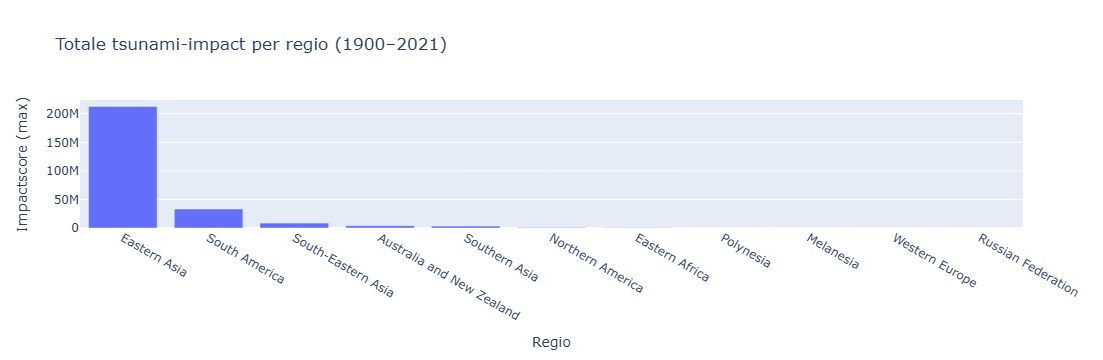

In [8]:
import pandas as pd
import plotly.express as px

dist_df = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'tsunami'].copy()

df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)
df["Total Damages ('000 US$)"] = pd.to_numeric(df["Total Damages ('000 US$)"], errors='coerce').fillna(0)
df["Total Affected"] = pd.to_numeric(df["Total Affected"], errors='coerce').fillna(0)

df['Impact_Score'] = df[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].max(axis=1)

region_stats = df.groupby('Region')[['Impact_Score', 'Total Deaths', 'Total Affected']].sum().reset_index()

fig = px.bar(region_stats.sort_values(by='Impact_Score', ascending=False),
             x='Region', y='Impact_Score',
             hover_data=['Total Deaths', 'Total Affected'],
             title='Totale tsunami-impact per regio (1900–2021)',
             labels={'Impact_Score': 'Maximale impactscore'})

fig.update_layout(xaxis_title='Regio', yaxis_title='Impactscore (max)')

fig.show()

De kaart maakt duidelijk waar tsunami’s plaatsvinden, maar zegt nog weinig over hoe zwaar deze rampen gemiddeld uitpakken per regio. Daarom is in deze balkgrafiek per wereldregio de totale impactscore van alle tsunami’s opgeteld.
Wat meteen opvalt is dat Azië en Oceanië met afstand de hoogste totalen laten zien. Deze regio’s vormen dan ook het epicentrum van tsunami-activiteit, zowel in frequentie als in ernst. Dit sluit aan bij wat in de kaart hierboven al te zien was: deze gebieden liggen pal op de tektonisch actieve ‘Ring of Fire’.
De impactscore is ook hier een handige maat, omdat het drie verschillende aspecten van schade combineert in één waarde. Sommige regio’s kunnen bijvoorbeeld weinig doden hebben maar wél veel economische schade, of andersom. Door de impactscore te gebruiken ontstaat een completer beeld van welke regio’s het zwaarst zijn getroffen.
De grafiek onderstreept niet alleen waar het risico het grootst is geweest, maar ook waar toekomstige inspanningen op het gebied van rampenpreventie en infrastructuur het hardst nodig zijn.